In [ ]:
#importing general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
#importing twitter libraries 
import tweepy
import requests

client = tweepy.Client( bearer_token="bearer_token", 
                        consumer_key="consumer_key", 
                        consumer_secret="consumer_secret", 
                        access_token="access_token", 
                        access_token_secret="access_token_secret", 
                        return_type = requests.Response,
                        wait_on_rate_limit=True)
# Define query
query = 'from:cardinalsama -media lang:en -is:retweet '

# get max. 20 tweets
tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id', 'created_at'],
                                     max_results=20)
# Save data as dictionary
tweets_dict = tweets.json() 

# Extract "data" value from dictionary
tweets_data = tweets_dict['data'] 



In [104]:
df = pd.json_normalize(tweets_data) 

df = df['text']

df = df.reset_index().rename(columns={'index': 'Id'})

df

,Id,text
0,0,If people could actually retain their greatest...
1,1,"@0xchackochan Nothing much , read a book with ..."
2,2,"It was a brand-new experience for me, reading ..."
3,3,"Too early to explore space , too late to explo..."
4,4,@MashMichi @Sydsnap JAPANESE TOM WTF ! THIS IS...
5,5,@younwimMn Literal chills after this scene
6,6,@pratish_9 This was too good . Literal mental ...
7,7,@pratish_9 Don't fuck with me unless kuch vali...
8,8,the existence and widespread knowledge of the ...
9,9,@jestingtime Why don't we ask for advice to ou...


#VADER model

The vader model is a relatively primitive model which uses each word as a way to decide positive or negative sentiment. this is unfortunately impractical as when communicating, we often string words to express ourselves, i.e. connected words share a different meaning relative to single words

In [95]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [96]:

sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [97]:

sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [101]:
res = {}
myid = 0
for text in df['text']:
    res[myid] = sia.polarity_scores(text)
    myid+=1
res

{0: {'neg': 0.241, 'neu': 0.69, 'pos': 0.069, 'compound': -0.8586},
 1: {'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'compound': 0.4939},
 2: {'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'compound': 0.5267},
 3: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 4: {'neg': 0.349, 'neu': 0.651, 'pos': 0.0, 'compound': -0.7027},
 5: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 6: {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4404},
 7: {'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'compound': 0.431},
 8: {'neg': 0.049, 'neu': 0.951, 'pos': 0.0, 'compound': -0.25},
 9: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 10: {'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'compound': 0.7906},
 11: {'neg': 0.0, 'neu': 0.917, 'pos': 0.083, 'compound': 0.4215},
 12: {'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'compound': 0.2577},
 13: {'neg': 0.089, 'neu': 0.767, 'pos': 0.144, 'compound': 0.6721},
 14: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 15: {'neg': 0.314, 'neu': 0.6

In [102]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
vaders

,Id,neg,neu,pos,compound,text
0,0,0.241,0.690,0.069,-0.8586,If people could actually retain their greatest...
1,1,0.000,0.894,0.106,0.4939,"@0xchackochan Nothing much , read a book with ..."
2,2,0.000,0.922,0.078,0.5267,"It was a brand-new experience for me, reading ..."
3,3,0.000,1.000,0.000,0.0000,"Too early to explore space , too late to explo..."
4,4,0.349,0.651,0.000,-0.7027,@MashMichi @Sydsnap JAPANESE TOM WTF ! THIS IS...
5,5,0.000,1.000,0.000,0.0000,@younwimMn Literal chills after this scene
6,6,0.000,0.775,0.225,0.4404,@pratish_9 This was too good . Literal mental ...
7,7,0.000,0.905,0.095,0.4310,@pratish_9 Don't fuck with me unless kuch vali...
8,8,0.049,0.951,0.000,-0.2500,the existence and widespread knowledge of the ...
9,9,0.000,1.000,0.000,0.0000,@jestingtime Why don't we ask for advice to ou...


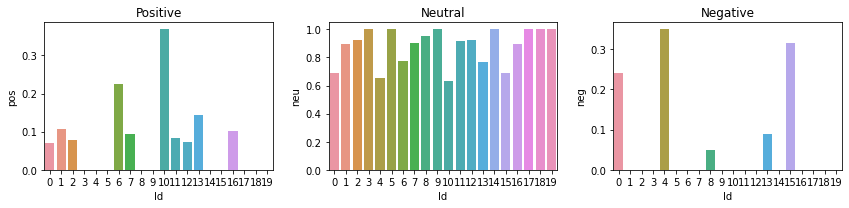

In [118]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Id', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Id', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Id', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()